# TODO
1. save fig as size
2. get sieze from header
3. send next as data

In [32]:
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from PIL import Image
import numpy as np

In [18]:
import gadgetron

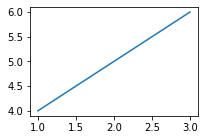

In [14]:
figure=plt.gcf() # type: Figure

figure.set_size_inches(3,2)

plt.plot([1,2,3],[4,5,6])
plt.savefig("abc.png", dpi=100)


In [15]:
!ls

abc.png  idea.ipynb  plot_gadget.py


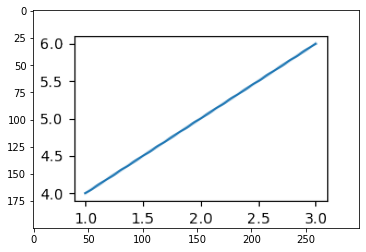

In [16]:
abc=plt.imread('abc.png')
plt.imshow(abc)

In [17]:
type(abc)

numpy.ndarray

In [19]:
from ismrmrd import Image, ImageHeader

In [20]:
i=Image()
i.data[:]=abc

h=ImageHeader()
h.__dict__

ValueError: could not broadcast input array from shape (200,300,4) into shape (1,1,1,0)

In [35]:
img=Image.open('abc.png')
img.mode
img.convert('L').save('out.png')
#img.convert('L').show()
#img.convert('I;16').save('out_I16.png')
img_new=Image.open('out.png')
#to gray scale
img_new=np.array(img.convert('L'))
np.array(dtype='uint16')


(200, 300)

![nihao](out.png)

In [ ]:
plt.imsave


In [27]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [ ]:
import gadgetron
import ismrmrd
from PIL import PILImage
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from numpy as np
figure=plt.gcf() # type: Figure
figure.set_size_inches(3,2)
plt.plot([1,2,3],[4,5,6])
plt.savefig("result.png", dpi=100)

gray_scale_img=Image.open('result.png').convert('L') # gray scale image

img_data=np.array(gray_scale_img) 

img_target=np.empty((img_data.size, ), 'uint16') # empty  16 bit
img_target[:]=img_data.reshape(img_data.size)  # assign old 8 bit to 16 bit 

c=1 # channel
z=1 # z size
h=200 # height 
w=300 # width
img_target=img_target.reshape((c,z,h,w))


i=ismrmrd.Image()
h=i.getHead()
h.data_type = ismrmrd.DATATYPE_UINT
i.data=img_target  


# ref

1. https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
2. https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes
3. https://note.nkmk.me/en/python-numpy-image-processing/
4. https://scipy-lectures.org/advanced/image_processing/

